<a href="https://colab.research.google.com/github/JonNData/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module4-Hyperparameter-Tuning/Nguyen_LS_DS_424_Hyperparameter_Tuning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [2]:
##### Your Code Here #####
import pandas as pd
url = 'https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv'
df = pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [0]:
# X features matrix and y target vector
features = list(df1)[:-1]
target = list(df1)[-1]
X = df1[features]
y = df1[target].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
# Target encode all categories
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder

encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)
encoder.get_feature_names

<bound method TargetEncoder.get_feature_names of TargetEncoder(cols=['customerID', 'gender', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)>

In [24]:
# Standard scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_encoded)
X_norm

array([[-1.        ,  1.00955867, -0.43991649, ...,  1.39974289,
        -1.16032292, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.55473949,
        -0.25962894, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.55473949,
        -0.36266036, -0.15193369],
       ...,
       [-1.        ,  1.00955867, -0.43991649, ...,  1.39974289,
        -1.1686319 , -0.15193369],
       [-1.        , -0.99053183,  2.27315869, ..., -0.55473949,
         0.32033821, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.73368684,
         1.35896134, -0.15193369]])

In [37]:
X_norm.shape, X_norm[0].shape

((7043, 20), (20,))

In [43]:
# Baseline keras ML model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X_norm[0].shape))
model.add(Dense(10))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

baseline = model.fit(X_norm, y, validation_split=0.2, epochs=20)


Epoch 1/20
177/177 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.6021 - val_loss: 0.4797 - val_accuracy: 0.7715
Epoch 2/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7922 - val_loss: 0.4099 - val_accuracy: 0.8006
Epoch 3/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8129 - val_loss: 0.3999 - val_accuracy: 0.8055
Epoch 4/20
177/177 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8174 - val_loss: 0.3983 - val_accuracy: 0.8105
Epoch 5/20
177/177 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8195 - val_loss: 0.3974 - val_accuracy: 0.8155
Epoch 6/20
177/177 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8191 - val_loss: 0.3985 - val_accuracy: 0.8176
Epoch 7/20
177/177 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8207 - val_loss: 0.3969 - val_accuracy: 0.8176
Epoch 

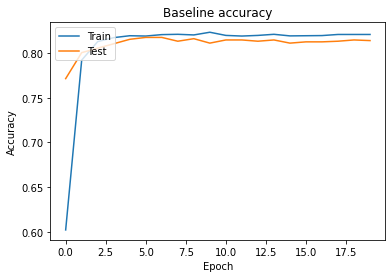

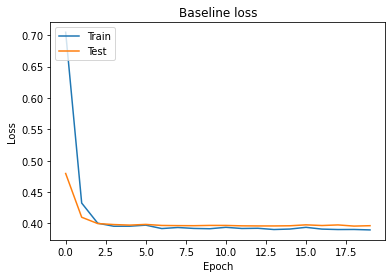

In [55]:
# Baseline!
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(baseline.history['accuracy'])
plt.plot(baseline.history['val_accuracy'])
plt.title('Baseline accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(baseline.history['loss'])
plt.plot(baseline.history['val_loss'])
plt.title('Baseline loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
X_norm

array([[-1.        ,  1.00955867, -0.43991649, ...,  1.39974289,
        -1.16032292, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.55473949,
        -0.25962894, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.55473949,
        -0.36266036, -0.15193369],
       ...,
       [-1.        ,  1.00955867, -0.43991649, ...,  1.39974289,
        -1.1686319 , -0.15193369],
       [-1.        , -0.99053183,  2.27315869, ..., -0.55473949,
         0.32033821, -0.15193369],
       [-1.        , -0.99053183, -0.43991649, ..., -0.73368684,
         1.35896134, -0.15193369]])

In [0]:
# Hyper param tuning
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# We use an api wrapper to that we can work with scikit_learn's gridsearchCV
# KerasClassifier's build_fn param needs a function of the model builder to 
# iterate over. So let's make that function
def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=X_norm[0].shape))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# now instantiate KerasClassifier with your function, first time calling model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [62]:
# now lets grid search some params!
param_grid = {'batch_size': [32,64,128,256,512],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-3)
grid_result = grid.fit(X_norm, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Epoch 1/20
177/177 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6647
Epoch 2/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7895
Epoch 3/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8033
Epoch 4/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8099
Epoch 5/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8104
Epoch 6/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8143
Epoch 7/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8140
Epoch 8/20
177/177 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8120
Epoch 9/20
177/177 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8135
Epoch 10/20
177/177 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8154

In [64]:
# To add learning rate as a hyperparam you need to specify it in the create_model
# It's part of an optimizer so we have to impor that as well

from tensorflow.keras.optimizers import Nadam

def create_model(learning_rate=0.1):
  model = Sequential()
  model.add(Flatten(input_shape=X_norm[0].shape))
  model.add(Dense(23, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  optimizer = Nadam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)


param_grid = {'learning_rate': [.001, .01, .1, .2, .3, .5],
              'epochs': [30]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-3)
grid_result = grid.fit(X_norm, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8166968345642089 using {'epochs': 30, 'learning_rate': 0.001}
Means: 0.8166968345642089, Stdev: 0.003060274547568726 with: {'epochs': 30, 'learning_rate': 0.001}
Means: 0.809882402420044, Stdev: 0.008598462388453463 with: {'epochs': 30, 'learning_rate': 0.01}
Means: 0.8104520916938782, Stdev: 0.007367356782833735 with: {'epochs': 30, 'learning_rate': 0.1}
Means: 0.7616063952445984, Stdev: 0.027210225706029604 with: {'epochs': 30, 'learning_rate': 0.2}
Means: 0.7349126458168029, Stdev: 0.004718131278199194 with: {'epochs': 30, 'learning_rate': 0.3}
Means: 0.6381063997745514, Stdev: 0.18990875613724623 with: {'epochs': 30, 'learning_rate': 0.5}


In [68]:
# Further tweaking 
def create_model(optimizer='adam', init='uniform' ):
  model = Sequential()
  model.add(Flatten(input_shape=X_norm[0].shape))
  model.add(Dense(23, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  #optimizer = Nadam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {#'learning_rate': [.001, 0.0005],
              'epochs': [50],
              'batch_size': [32],
              'optimizer': ['rmsprop', 'adam', 'nadam'],
              'init': ['glorot_uniform', 'normal', 'uniform']
              }

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-3)
grid_result = grid.fit(X_norm, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8176910519599915 using {'batch_size': 32, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
Means: 0.8125795364379883, Stdev: 0.0035816012990457172 with: {'batch_size': 32, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
Means: 0.8121535062789917, Stdev: 0.0035172800597427843 with: {'batch_size': 32, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
Means: 0.8165560126304626, Stdev: 0.002677631645659132 with: {'batch_size': 32, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'nadam'}
Means: 0.8164129495620728, Stdev: 0.004740089485977629 with: {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
Means: 0.8155614852905273, Stdev: 0.004295189000996745 with: {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
Means: 0.8135738492012023, Stdev: 0.004566301651920762 with: {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'nadam'}
Means: 0.8125781178474426, Stdev: 0.0069006195274146365 with: {'

In [70]:
# Now let's try and run what we learned

def create_model(learning_rate=0.001, init='uniform'):
  model = Sequential()
  model.add(Flatten(input_shape=X_norm[0].shape))
  model.add(Dense(10, kernel_initializer=init,activation='relu'))
  model.add(Dense(1, kernel_initializer=init,activation='sigmoid'))

  optimizer = Nadam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'learning_rate': [.001],
              'epochs': [100],
              'batch_size': [10, 32],
              'init': [ 'uniform']
              }

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-3)
grid_result = grid.fit(X_norm, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8166964530944825 using {'batch_size': 32, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001}
Means: 0.8151353478431702, Stdev: 0.0038631967523415456 with: {'batch_size': 10, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001}
Means: 0.8166964530944825, Stdev: 0.0034251548188273698 with: {'batch_size': 32, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001}


In [87]:
# early stopping, manual time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=20)

model = Sequential()
model.add(Flatten(input_shape=X_norm[0].shape))
model.add(Dense(20, activation='selu'))
Dropout(.1)
model.add(Dense(20, activation='selu'))
Dropout(.1),
model.add(Dense(1, activation='sigmoid'))
optimizer= Nadam(learning_rate=0.0012)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_norm, y, validation_split=0.20, epochs=100, callbacks=[stop])


Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7810 - val_loss: 0.4050 - val_accuracy: 0.8062
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8149 - val_loss: 0.4063 - val_accuracy: 0.8077
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8172 - val_loss: 0.3992 - val_accuracy: 0.8126
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8188 - val_loss: 0.4105 - val_accuracy: 0.8062
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8204 - val_loss: 0.3998 - val_accuracy: 0.8119
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8213 - val_loss: 0.3986 - val_accuracy: 0.8126
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8198 - val_loss: 0.4025 - val_accuracy: 0.8077

will not have a perceptron by scratch. 
Emulate perceptron architecture in keras, know the architecture of a perceptron
estimate  a model, with keras, hyperparam choices
basic info of perceptrons, why can't XOR gate solve

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?